# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение информации из файла. 

In [1]:
# сначала откроем файл
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # при открытии файла обнаружлось, что столбцы разделены \t
data



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца и 23699 строк. Есть строки с большим количеством пропусков. Также есть строки, которые нужно привести к змеиному регистру

### Предобработка данных

In [3]:
# прежде чем приступить к работе с пропусками, изменим стиль названия некоторых столбцов
data = data.rename(columns={'parks_around3000':'parks_around_3000', 'ponds_around3000':'ponds_around_3000', 'cityCenters_nearest':'city_centers_nearest'})

# определим, в каких столбцах есть пропуски
#print(data.isna().sum())
data['balcony'] = data['balcony'].fillna(0).astype('int')  # скорее всего пропуски, потому что балкона нет вовсе
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')  # аналогично балконам в радиусе 3 км может не быть парков и прудов
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')  
data['is_apartment'] = data['is_apartment'].fillna(False)  # True только в 50 случаях, скорее всего, остальные таковыми и не являются, поэтому пропуски
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())  # высоту потолков приводим к медианному значению
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')  # меняем дату на подъодящий формат
print(data.isna().sum())

# Пропуски в столбцах с объектами инфраструктуры не помешают, чтобы достичь поставленных задач.
# Пропуски в количестве дней размещения означают, что скорее всего квартира не продана.
# В столбце с названиями населённых пунктов непонятна причина пропусков, да и доля невелика, поэтому оставим так.



total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
# избавимся от неявных дубликатов в названиях населённых пунктов
print('Уникальных значений до обработки', len(data['locality_name'].unique()))


data['locality_name'].sort_values().unique()
replace_name = ['деревня ', 'поселок ', 'посёлок ', 'поселок городского типа ', 'городской поселок ', 'село ', 'коттеджный поселок ', 'садовое товарищество ']
for name in replace_name:
    data['locality_name'] = data['locality_name'].str.replace(name, '')

    
print('Уникальных значений после обработки', len(data['locality_name'].unique()))

Уникальных значений до обработки 365
Уникальных значений после обработки 322


In [5]:
#  Далее проверим столбцы на наличие выбросов
data['ceiling_height'].value_counts()
data['ceiling_height'] = data.loc[(data['ceiling_height'] <= 5)&(data['ceiling_height'] > 2), ['ceiling_height']]  # оставим высоту потлков от 2 до 5 метров        

In [6]:
data['total_area'].describe()  # проблем не обнаружено

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [7]:
data['living_area'].describe()
data['living_area'] = data.loc[data['living_area'] > 10, 'living_area']  # сделаем минимальную жилую площаль от 10

In [8]:
data['kitchen_area'].describe()  # также приведём размеры кухни к адекватным
data['kitchen_area'] = data.loc[data['kitchen_area'] < 50, 'kitchen_area']
data['kitchen_area'] = data.loc[data['kitchen_area'] > 4, 'kitchen_area']
data['kitchen_area'].describe()

count    21309.000000
mean        10.445753
std          5.178937
min          4.100000
25%          7.000000
50%          9.100000
75%         12.000000
max         49.400000
Name: kitchen_area, dtype: float64

In [9]:
data['last_price'].describe()
data['last_price'] = data.loc[data['last_price'] > 400000, 'last_price']  # установим минимальную цену в 400000

In [10]:
data['rooms'].value_counts()
data['rooms'] = data.loc[data['rooms'] <= 10, 'rooms']  # оставим недвижимость с количесвтом комнат до 10


In [11]:
data['floor'].describe()  # проблем с этажами нет 

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [12]:
data['balcony'].describe()  # с балконами проблем также не обнаружено

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

### Добавление в таблицу новых столбцов

In [13]:
# добавим в таблицу цену за квадратный метр; день, месяц и год, когда было выставлено объявдление; а также добавим тип этажа
data['price_per_square'] = data['last_price']/data['total_area']  
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif 1 < floor < floors_total:
        return 'другой'
    elif floor == floors_total:
        return 'последний'
    
data['floor_category'] = data.apply(floor_category, axis = 1)
data['city_centers_nearest_km'] = data['city_centers_nearest']//1000  # добавим столбец с расстоянием до центра в км





### Анализ данных

Text(0.5, 1.0, 'Общая площадь')

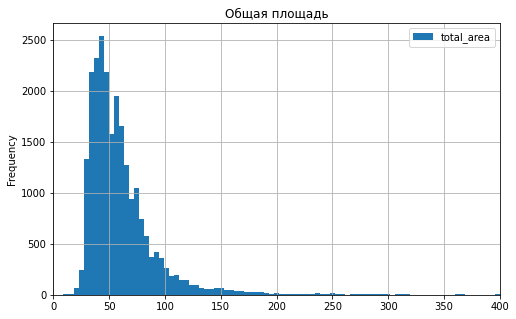

In [14]:
data.plot(y='total_area',
          kind='hist',
          bins=100,
          figsize=(8, 5),
          range=(0, 450),
          grid=True          
         )
plt.xlim(0, 400)
plt.title('Общая площадь')

Наибольшее количество квартир имеет площадь в районе 30-70 метров.

Text(0.5, 1.0, 'Жилая площадь')

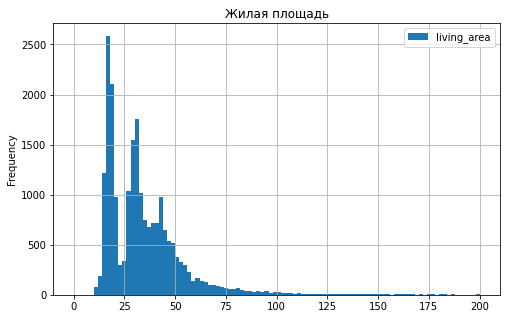

In [16]:
data.plot(y='living_area',
          kind='hist',
          bins=100,
          figsize=(8, 5),
          range=(0, 200),
          grid=True          
         )
plt.title('Жилая площадь')

В большинстве случаев жилая площадь не занимает более 45 метров, выделяется пик в районе 20-25 метров, скорее всего речь идёт об однушках или студиях.

Text(0.5, 1.0, 'Площадь кухни')

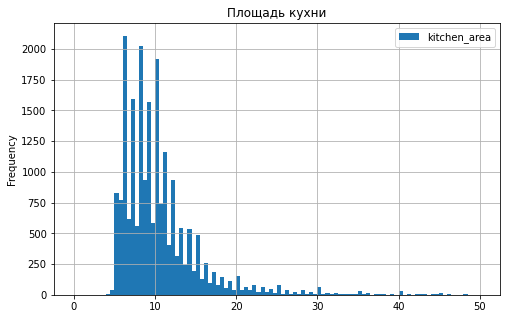

In [17]:
data.plot(y='kitchen_area',
          kind='hist',
          bins=100,
          figsize=(8, 5),
          range=(0, 50),
          grid=True          
         )
plt.title('Площадь кухни')

Основная масса квартир имеет площаль кухни менее 15 метров, особо много в районе 6-10 метров.

Text(0.5, 0, 'Цена в 10 млн')

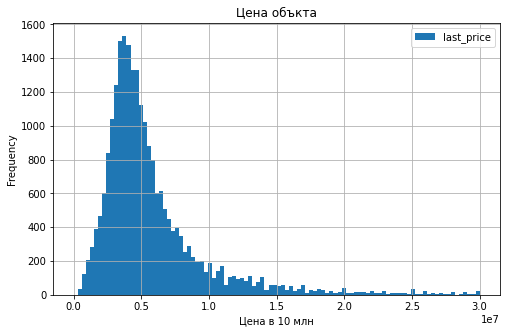

In [18]:
data.plot(y='last_price',
          kind='hist',
          bins=100,
          figsize=(8, 5),
          range=(0, 30000000),
          grid=True          
         )
plt.title('Цена объкта')
plt.xlabel('Цена в 10 млн')

Самые распространённые цены в диапазоне от 3 до 8 миллионов.

Text(0.5, 1.0, 'Кол-во комнат')

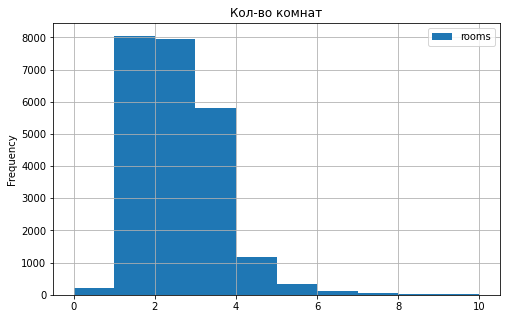

In [19]:
data.plot(y='rooms',
          kind='hist',
          bins=10,
          figsize=(8, 5),
          range=(0, 10),
          grid=True          
         )
plt.title('Кол-во комнат')

Чаще всего встречаются квартиры с количеством комнат от 1 до 3

Text(0.5, 1.0, 'Высота потолков')

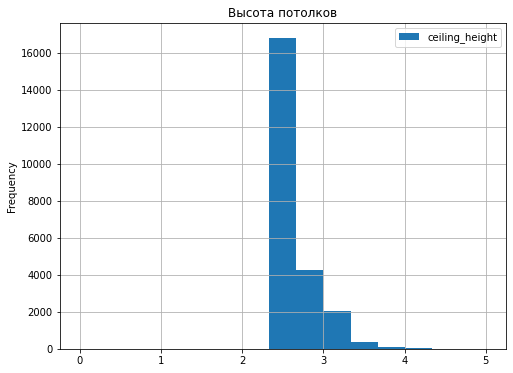

In [20]:
data.plot(y='ceiling_height',
          kind='hist',
          bins=15,
          figsize=(8, 6),
          range=(0, 5),
          grid=True          
         )
plt.title('Высота потолков')

В большинсвте квартир потолки 2.5 метра

Text(0.5, 1.0, 'Этаж квартиры')

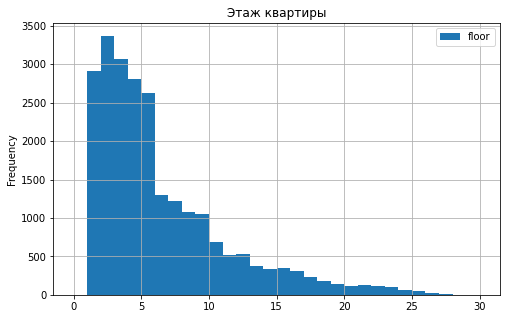

In [21]:
data.plot(y='floor',
          kind='hist',
          bins=30,
          figsize=(8, 5),
          range=(0, 30),
          grid=True          
         )
plt.title('Этаж квартиры')

Самое большое количество квартир находится ниже 10 этажа

другой       17363
последний     3336
первый        2917
Name: floor_category, dtype: int64

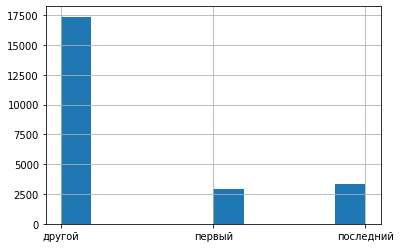

In [22]:
# Оценим количество квартир по категории этажа
data['floor_category'].hist()
data['floor_category'].value_counts()

Квартир, находящихся на последнем и на первом этажах, сильно меньше, чем остальных

Text(0.5, 1.0, 'Общее число этажей')

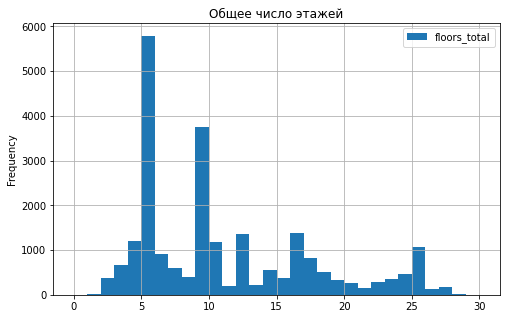

In [23]:
data.plot(y='floors_total',
          kind='hist',
          bins=30,
          figsize=(8, 5),
          range=(0, 30),
          grid=True          
         )
plt.title('Общее число этажей')

Наибольше число квартир в 6 и 9 этажных домах, не муравейники

Text(0.5, 1.0, 'Расстояние до центра')

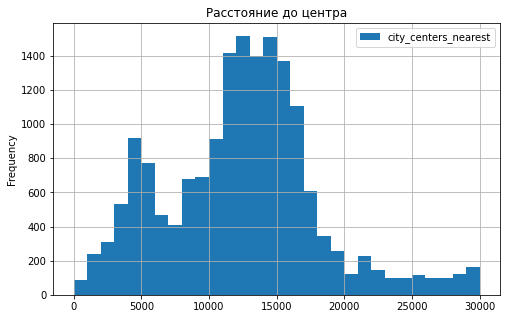

In [24]:
data.plot(y='city_centers_nearest',
          kind='hist',
          bins=30,
          figsize=(8, 5),
          range=(0, 30000),
          grid=True          
         )
plt.title('Расстояние до центра')

Больше всего квартир в 11-17 км от центра города

Text(0.5, 1.0, 'Расстояние до аэропорта')

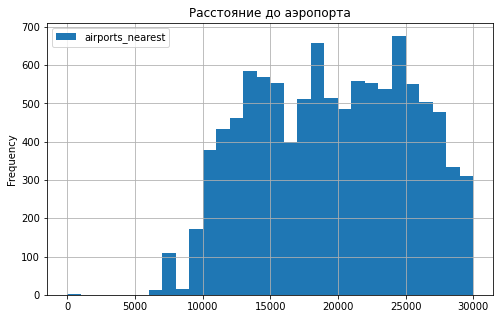

In [25]:
data.plot(y='airports_nearest',
          kind='hist',
          bins=30,
          figsize=(8, 5),
          range=(0, 30000),
          grid=True          
         )
plt.title('Расстояние до аэропорта')

Очень малая часть находится ближе 10км к аэропорту, в основном квартиры примерно равно удалены на расстояние от 10 до 28.

Text(0.5, 1.0, 'Расстояние до ближаёшего парка')

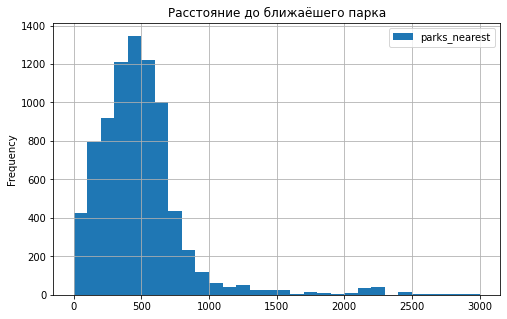

In [26]:
data.plot(y='parks_nearest',
          kind='hist',
          bins=30,
          figsize=(8, 5),
          range=(0, 3000),
          grid=True          
         )
plt.title('Расстояние до ближаёшего парка')

Там, где есть неподалёку парки, они находятся в пешей доступности от жилья. Но количество таких квартир относительно всей выборки достаточно невелико.

Text(0.5, 1.0, 'Месяц публикации')

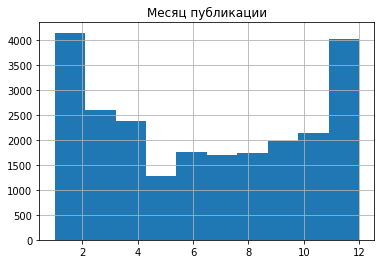

In [27]:
data['exposition_month'].hist()
plt.title('Месяц публикации')

Text(0.5, 1.0, 'День публикации')

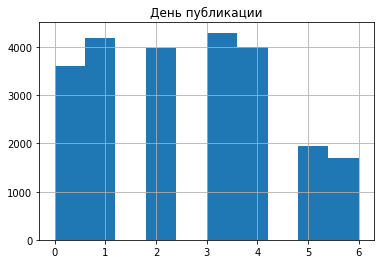

In [28]:
data['exposition_weekday'].hist()
plt.title('День публикации')

Наиболее часто публикуют объявления в будние дни и зимние месяцы

**Изучим, как быстро продавались квартиры**

Text(0.5, 1.0, 'Время продажи')

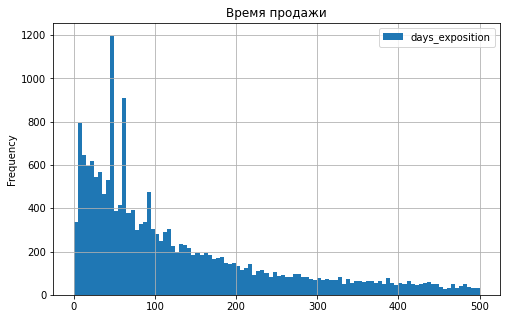

In [29]:
data.plot(y='days_exposition',
          kind='hist',
          bins=100,
          figsize=(8, 5),
          range=(0, 500),
          grid=True          
         )
plt.title('Время продажи')

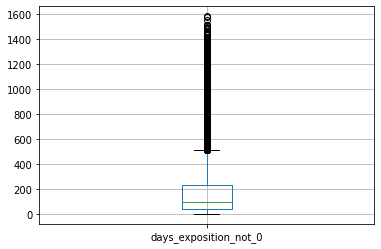

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition_not_0, dtype: float64


In [30]:
data['days_exposition_not_0'] = data.loc[data['days_exposition'] > 0, 'days_exposition'] #  добавим столбец, где нет объявлений меньше одного дня
data.boxplot(column='days_exposition_not_0')
plt.show()
print(data['days_exposition_not_0'].describe())

Text(0.5, 1.0, 'Время продажи')

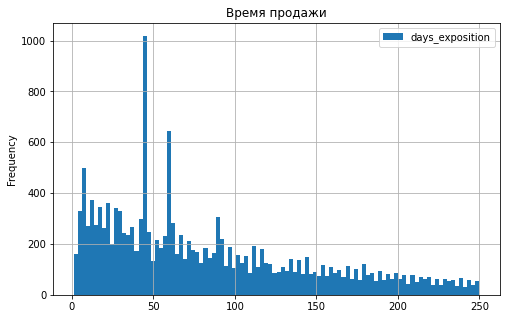

In [31]:
data.plot(y='days_exposition',
          kind='hist',
          bins=100,
          figsize=(8, 5),
          range=(1, 250),
          grid=True          
         )
plt.title('Время продажи')

Среднее время продажи квартиры 180 дней, медиана - 95. Наибольшее число продаж происходит около 45 и 60 дней. Быстрой продажей можно считать до 45 дней, медленной - от 230 дней

**Далее изучим, какие факторы больше всего влияют на общую стоимость недвижимости**

Коэффициент корреляции: 0.6537402377092495


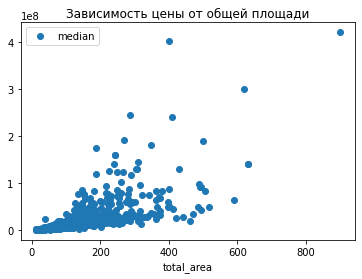

In [32]:
price_total_area_pivot = data.pivot_table(index='total_area', values='last_price', aggfunc=['count', 'mean', 'median'])
price_total_area_pivot.columns = ['count', 'mean', 'median']
price_total_area_pivot.plot(y = 'median', style = 'o')
plt.title('Зависимость цены от общей площади')
print('Коэффициент корреляции:', data['last_price'].corr(data['total_area']))

Существует несильная связь между ценой и общей площадью

Коэффициент корреляции: 0.567621030365706


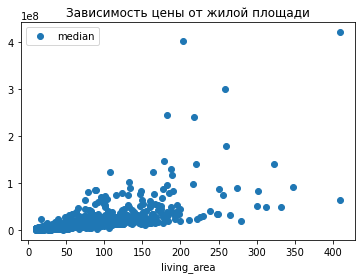

In [33]:
price_living_area_pivot = data.pivot_table(index='living_area', values='last_price', aggfunc=['count', 'mean', 'median'])
price_living_area_pivot.columns = ['count', 'mean', 'median']
price_living_area_pivot.plot(y = 'median', style = 'o')
plt.title('Зависимость цены от жилой площади')
print('Коэффициент корреляции:', data['last_price'].corr(data['living_area']))

Цена также зависит от жилой площади, но не сильно

Коэффициент корреяции: 0.4670824019651631


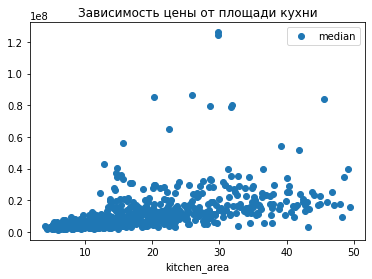

In [34]:
price_kitchen_area_pivot = data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['count', 'mean', 'median'])
price_kitchen_area_pivot.columns = ['count', 'mean', 'median']
price_kitchen_area_pivot.plot(y = 'median', style = 'o')
plt.title('Зависимость цены от площади кухни')
print('Коэффициент корреяции:', data['last_price'].corr(data['kitchen_area']))

Зависимость цены от площади кухни также невелика

<AxesSubplot:xlabel='rooms'>

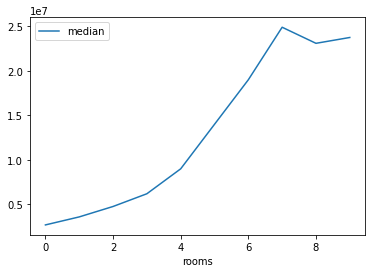

In [35]:
price_rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'mean', 'median'])
price_rooms_pivot.columns = ['count', 'mean', 'median']
price_rooms_pivot.query('rooms < 10').plot(y='median')

Чем больше комнат, тем выше цена

<AxesSubplot:xlabel='floor_category'>

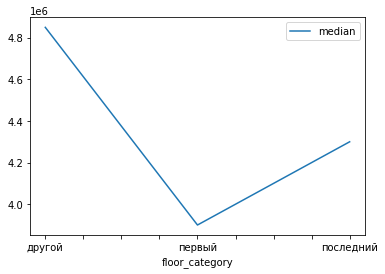

In [36]:
price_floor_category_pivot = data.pivot_table(index='floor_category', values='last_price', aggfunc=['count', 'mean', 'median'])
price_floor_category_pivot.columns = ['count', 'mean', 'median']
price_floor_category_pivot.plot(y='median')

Дешевле всего квартиры, находящиеся на первом этаже

Коэффициент корреяции(день): -0.007298628468845339
Коэффициент корреяции(месяц): -0.0020768090748387014
Коэффициент корреяции(год): 0.00864808448151074


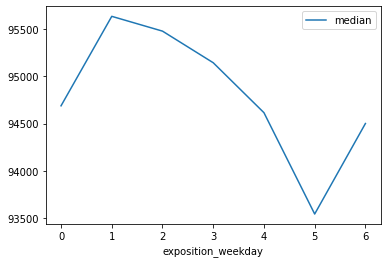

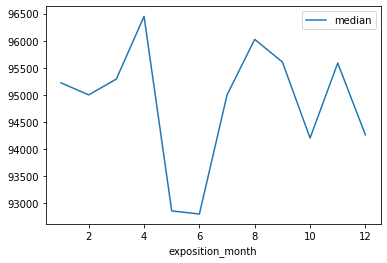

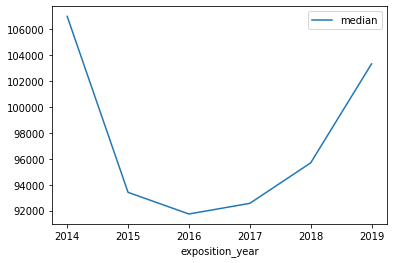

In [37]:
price_weekday_pivot = data.pivot_table(index='exposition_weekday', values='price_per_square', aggfunc=['count', 'mean', 'median'])
price_weekday_pivot.columns = ['count', 'mean', 'median']
price_weekday_pivot.plot(y='median')
print('Коэффициент корреяции(день):', data['price_per_square'].corr(data['exposition_weekday']))

price_month_pivot = data.pivot_table(index='exposition_month', values='price_per_square', aggfunc=['count', 'mean', 'median'])
price_month_pivot.columns = ['count', 'mean', 'median']
price_month_pivot.plot(y='median')
print('Коэффициент корреяции(месяц):', data['price_per_square'].corr(data['exposition_month']))

price_year_pivot = data.pivot_table(index='exposition_year', values='price_per_square', aggfunc=['count', 'mean', 'median'])
price_year_pivot.columns = ['count', 'mean', 'median']
price_year_pivot.plot(y='median')
print('Коэффициент корреяции(год):', data['price_per_square'].corr(data['exposition_year']))

По коэффициенту корреляции видно, что нет никакой заивисмости цены ни от дня недели, ни от месяца, ни от года в который выставили квартиру на продажу. По графикам можно сказать, что в летние месяцы цена ниже. Также цена в 2015-2018 годах сильно просела.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и определим населённые пункты с самой высокой и низкой стоимостью квадратного метра**

In [38]:
top_10 = data.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count', 'mean'])
top_10.columns = ['count', 'mean']
display(top_10.sort_values('count', ascending=False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,15720,114856.307596
Мурино,590,86087.512050
Кудрово,472,95324.930544
Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
Парголово,327,90175.913458
Гатчина,307,68746.146763


Из десяти населённых пунктов с наибольшим числом объявлений самая выскоая цена за квадратный метр в Санкт-Петербурге, самая низкая - в Выборге.

**Теперь определим, как в Санкт-Петербурге влияет расстояние до центра города на стоимость.**

,price_per_square
city_centers_nearest_km,
0.0,187324.130319
1.0,166442.183762
2.0,146662.860056
3.0,129370.144145
4.0,137148.290679
...,...
60.0,56250.000000
61.0,60606.060606
62.0,65807.235421


<AxesSubplot:xlabel='city_centers_nearest_km'>

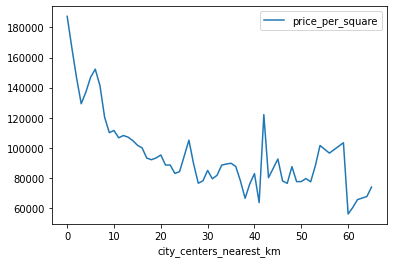

In [39]:
spb_pivot = data.pivot_table(index='city_centers_nearest_km', values='price_per_square', aggfunc='mean')
display(spb_pivot.sort_values('city_centers_nearest_km'))
spb_pivot.sort_values('city_centers_nearest_km').plot(y='price_per_square')

Всё достаточно очевидно: чем ближе к центру города, тем выше цена за квадратный метр.

### Общий вывод

Данные для анализа содержат информацию о конкретной квартире, выставленной на продажу (добавленные пользователем и полученные автоматически).

В процессе обработки были выявлены и удалены пропуски там, где это возможно. Пропуски возникли скорее всего по той причине, что картографические данные взяты из разных источников, а пользователи заполняли не все поля. Также были внесены изменения в названия стобцов, их типов данных, а ещё избавились от аномальных зачений, которые могли повлиять на качество исследования. Избавились от дубликатов в названиях населённых пунктов. Также в таблицу были добавлены столбцы с данными для удобства расчётов (например, цена за квадратный метр).

Далее мы изучили рынок жилья. Исследование показало, что наибольшим спросом пользуются 1-3 комнатные квартиры небольшой площади 30-70 квадратных метров с ценой от 3 до 8 миллионов. Была определена средняя продолжительность продажи квартиры, составляющая 95 дней.

Затем были выявлены зависимости между ценой объекта и некоторыми характеристиками. Влияние на стоимость оказывают: населённый пункт (самые дорогие квартиры в Санкт-Петербурге), приближенность к центру (чем ближе, тем выше цена), количество комнат, площадь (жилая и нежилая) и этаж. Дата публикации объявления слабо коррелирует с ценой, в определённую дату на неё скорее всего действуют другие факторы.
